1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


2. Load Dataset

In [3]:
df = pd.read_csv("dataset_HR.csv")

# Quick overview of the dataset
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SatisfactionLevel    1140 non-null   float64
 1   LastEvaluation       1140 non-null   float64
 2   NumberProjects       1140 non-null   float64
 3   AverageMonthlyHours  1140 non-null   float64
 4   TimeSpentCompany     1140 non-null   float64
 5   WorkAccident         1140 non-null   float64
 6   PromotionLast5Years  1140 non-null   float64
 7   Department           1140 non-null   object 
 8   Salary               1140 non-null   object 
 9   OverTime             1140 non-null   object 
 10  Attrition            1140 non-null   object 
dtypes: float64(7), object(4)
memory usage: 103.3+ KB
None
       SatisfactionLevel  LastEvaluation  NumberProjects  AverageMonthlyHours  \
count        1140.000000     1140.000000     1140.000000          1140.000000   
mean            0.5484

Missing Values

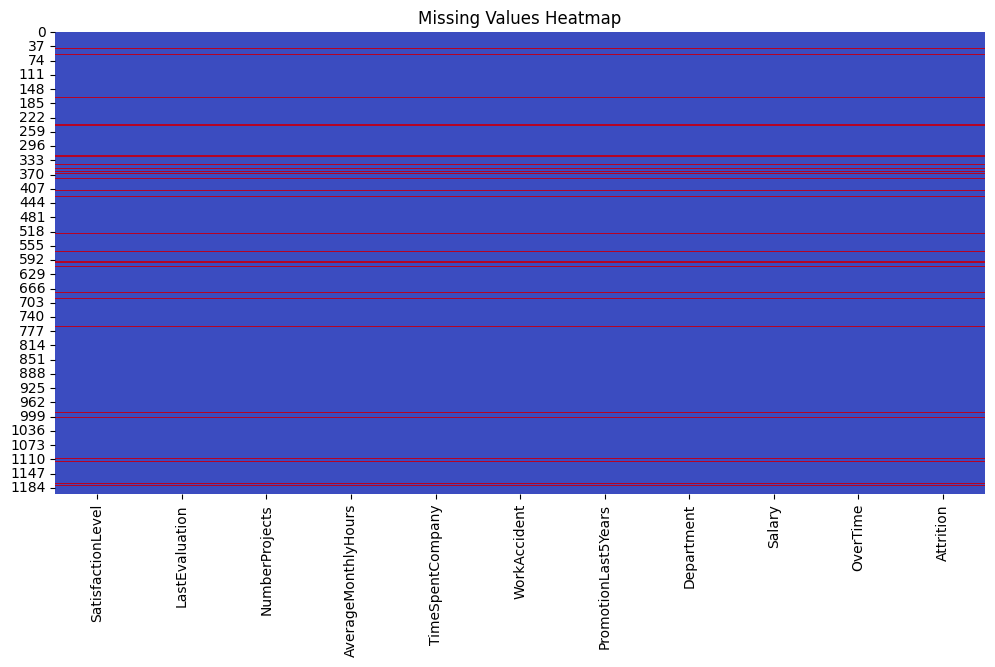

In [4]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm")
plt.title("Missing Values Heatmap")
plt.show()


3. Quality Assessment

Completeness Score

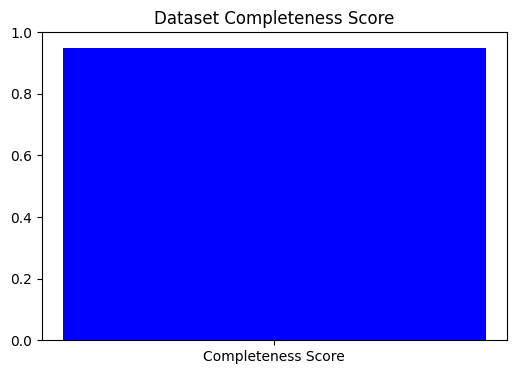

In [5]:
completeness_score = 1 - (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]))

plt.figure(figsize=(6, 4))
plt.bar(["Completeness Score"], [completeness_score], color="blue")
plt.title("Dataset Completeness Score")
plt.ylim(0, 1)
plt.show()


Data Type Score

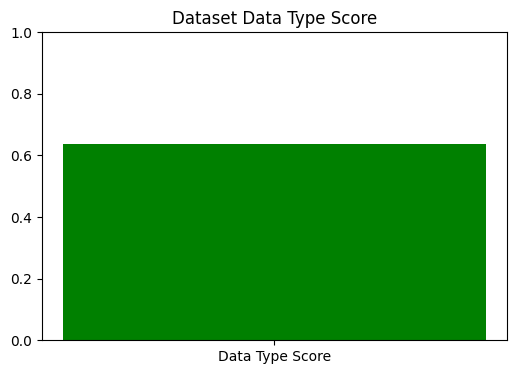

In [6]:
data_type_score = sum(df.dtypes.apply(lambda x: x in ['int64', 'float64'])) / len(df.columns)

plt.figure(figsize=(6, 4))
plt.bar(["Data Type Score"], [data_type_score], color="green")
plt.title("Dataset Data Type Score")
plt.ylim(0, 1)
plt.show()


Duplicate Score

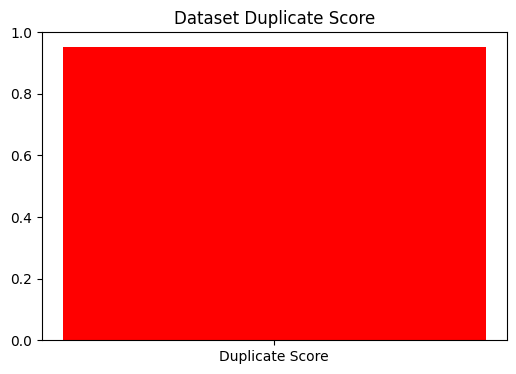

In [7]:
duplicate_score = 1 - df.duplicated().mean()

plt.figure(figsize=(6, 4))
plt.bar(["Duplicate Score"], [duplicate_score], color="red")
plt.title("Dataset Duplicate Score")
plt.ylim(0, 1)
plt.show()


Outlier Score (Using Z-score Analysis)

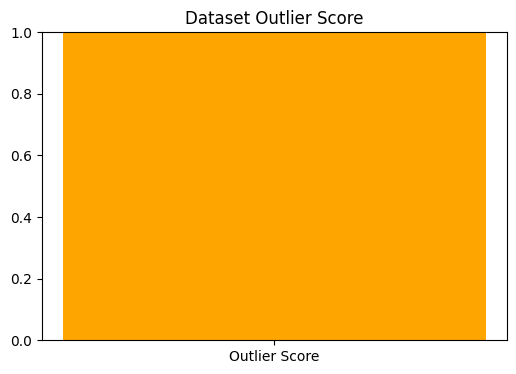

In [14]:
numeric_df = df.select_dtypes(include=['number'])
z_scores = np.abs(zscore(numeric_df.dropna()))
outlier_score = 1 - (np.sum(z_scores > 3) / (numeric_df.shape[0] * numeric_df.shape[1]))

plt.figure(figsize=(6, 4))
plt.bar(["Outlier Score"], [outlier_score], color="orange")
plt.title("Dataset Outlier Score")
plt.ylim(0, 1)
plt.show()


4. Check Column with Most Null Values

Column with most null values: SatisfactionLevel (60 nulls)


C:\Users\Zbook\AppData\Local\Temp\ipykernel_25468\1468161070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=null_counts.index, y=null_counts.values, palette="coolwarm")


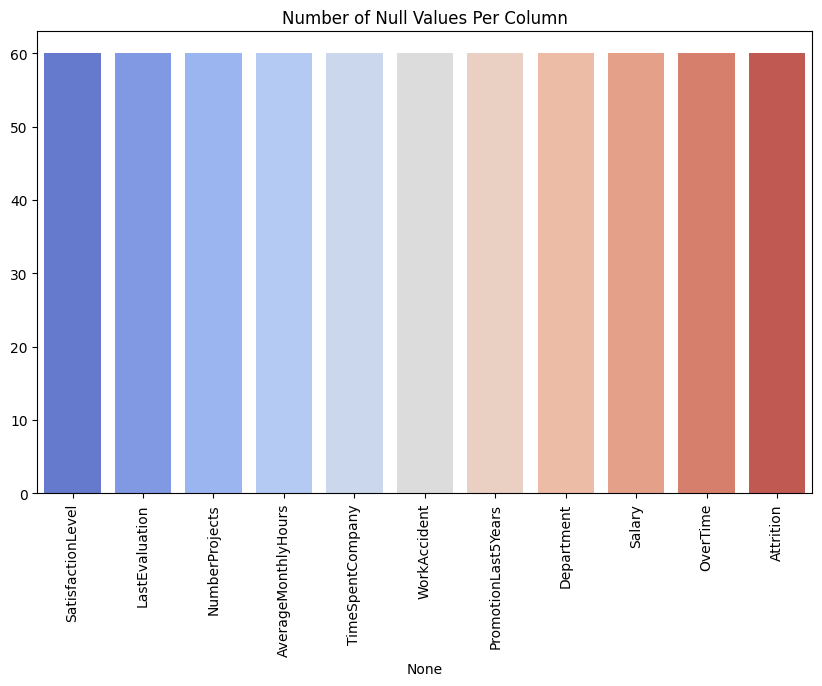

In [8]:
null_counts = df.isnull().sum()
most_null_column = null_counts.idxmax()
print(f"Column with most null values: {most_null_column} ({null_counts.max()} nulls)")

plt.figure(figsize=(10,6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Number of Null Values Per Column")
plt.show()


5. Correlation Matrix

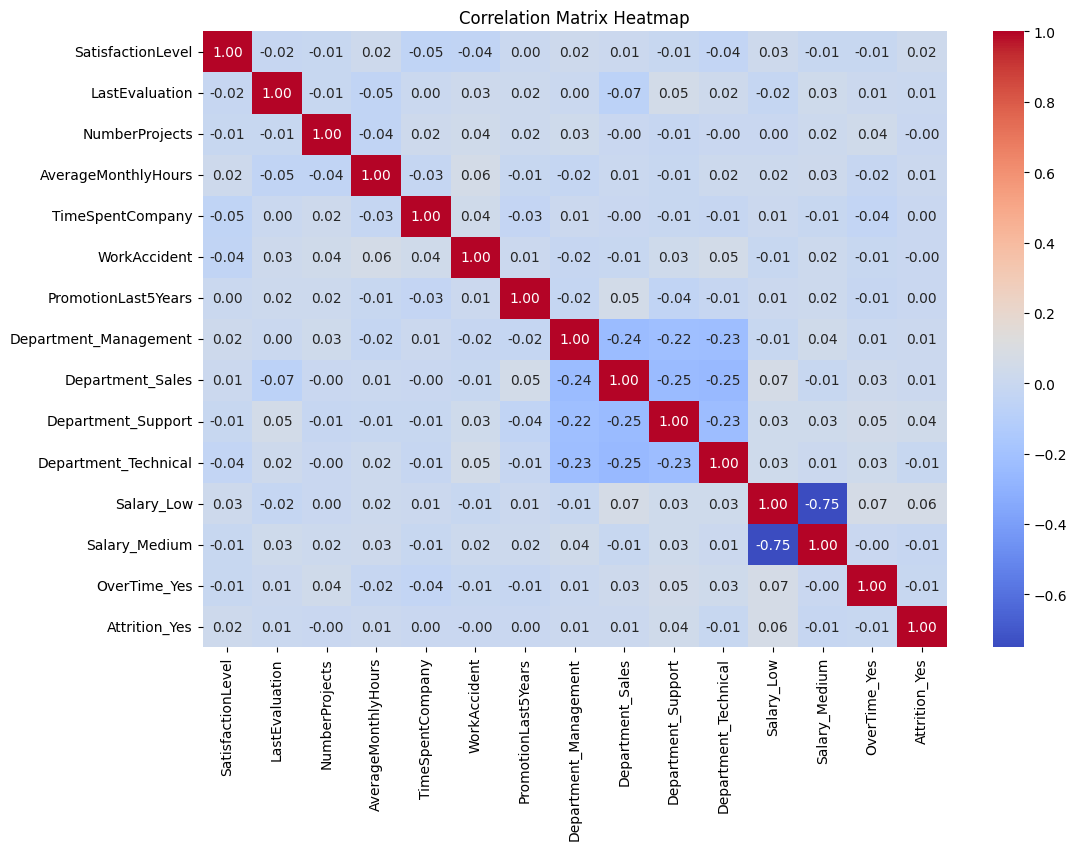

In [11]:
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical columns to numeric format
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()



Scatterplot for Key Correlations

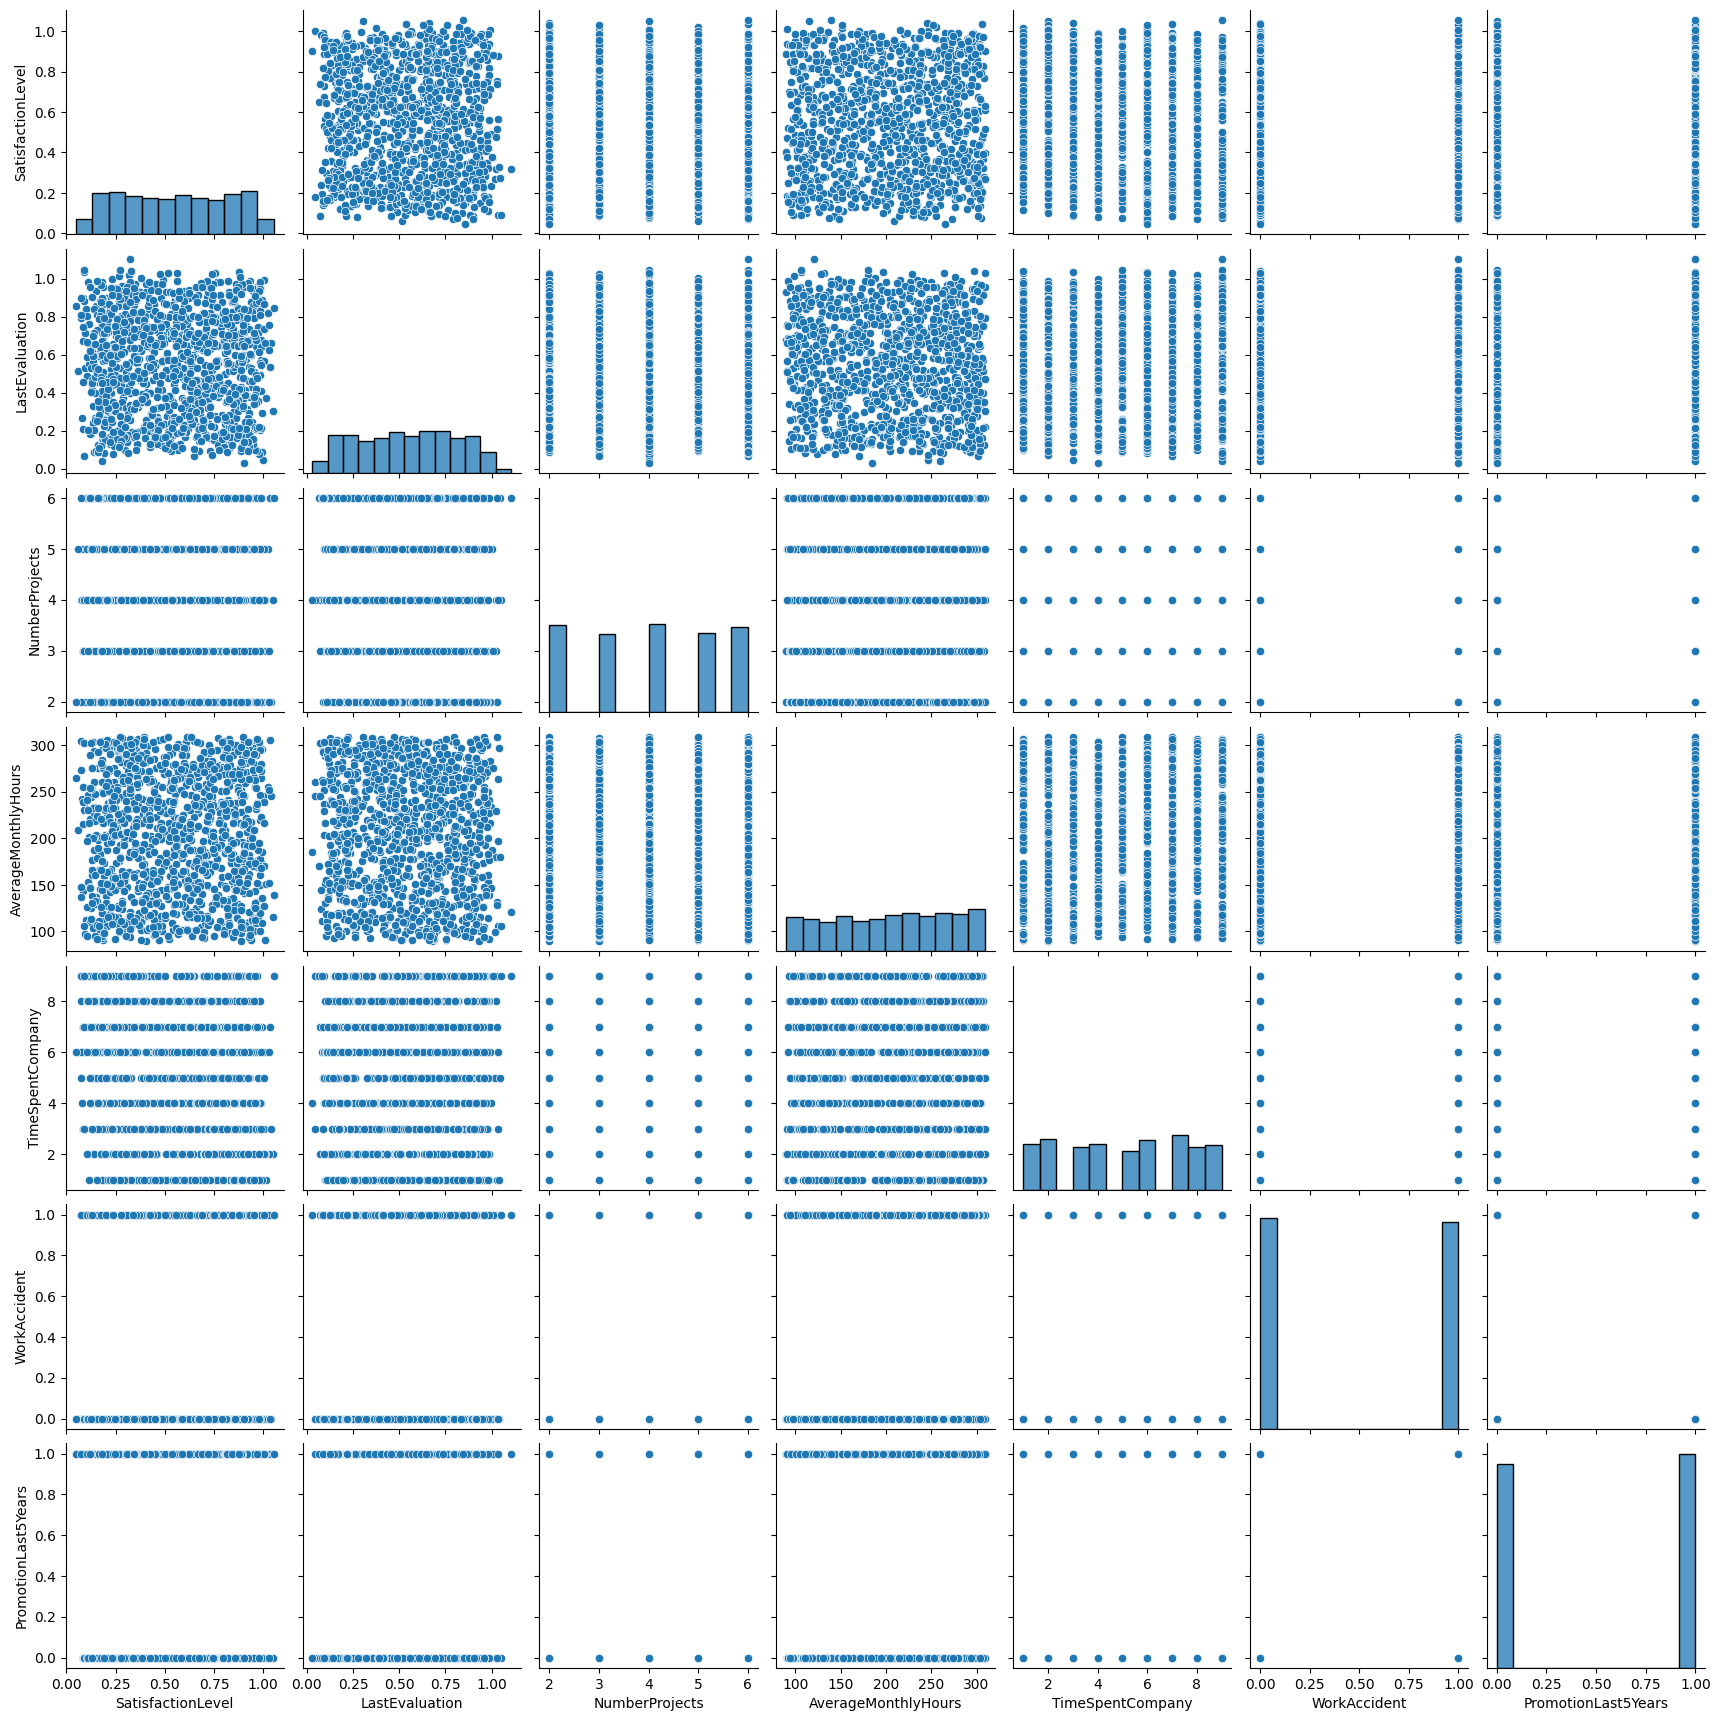

In [10]:
sns.pairplot(df.select_dtypes(include=['number']))
plt.show()



6. Feature Selection (Removing Highly Correlated Columns)

Highly correlated columns removed: ['LastEvaluation', 'NumberProjects', 'AverageMonthlyHours', 'TimeSpentCompany', 'WorkAccident', 'PromotionLast5Years', 'Department_Management', 'Department_Sales', 'Department_Support', 'Department_Technical', 'Salary_Low', 'Salary_Medium', 'OverTime_Yes', 'Attrition_Yes']


C:\Users\Zbook\AppData\Local\Temp\ipykernel_25468\3610023263.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_features, y=[abs(corr_matrix[col].max()) for col in high_corr_features], palette="coolwarm")


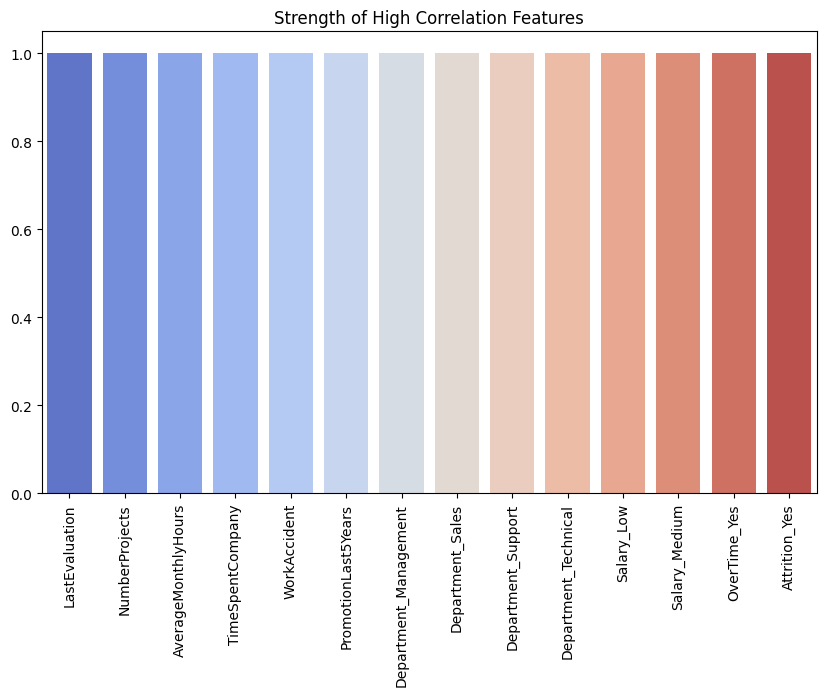

In [12]:
threshold = 0.8
high_corr_features = [col for col in corr_matrix.columns if any(abs(corr_matrix[col]) > threshold) and col != corr_matrix.columns[0]]
existing_columns = [col for col in high_corr_features if col in df.columns]
df_reduced = df.drop(columns=existing_columns)
print("Highly correlated columns removed:", high_corr_features)
plt.figure(figsize=(10,6))
sns.barplot(x=high_corr_features, y=[abs(corr_matrix[col].max()) for col in high_corr_features], palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Strength of High Correlation Features")
plt.show()
